In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster',rc={"lines.linewidth":1})


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import kid_readout.analysis.process_mmw_response

no data directory set up for clouds defaulting to /data


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-03-19_215231_mmw_frequency_sweep.nc',k) for k in range(16)]

In [6]:
mmws.extend([kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-03-19_221313_mmw_frequency_sweep.nc',k) for k in range(16)])

In [6]:
#!mkdir /artemis/readout/plots/2016-02-23-jpl-2015-10-park-40nm-al-nb-gp

In [7]:
#plot_dir = '/artemis/readout/plots/2016-02-23-jpl-2015-10-park-40nm-al-nb-gp/'

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


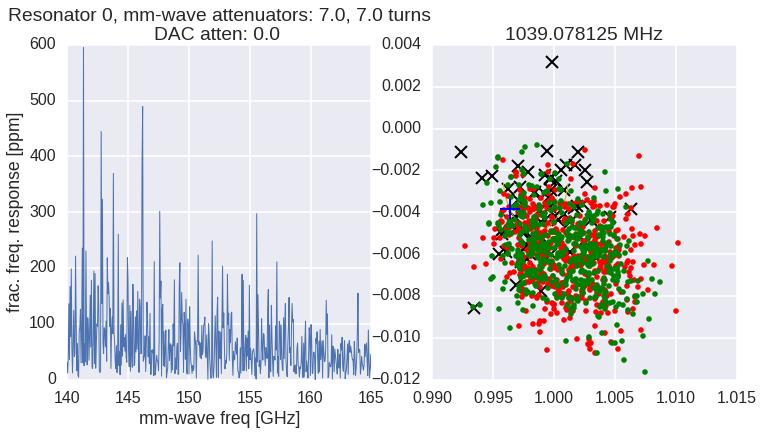

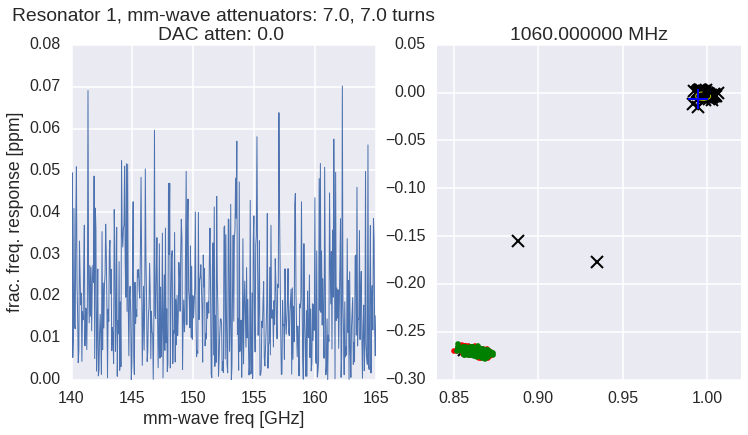

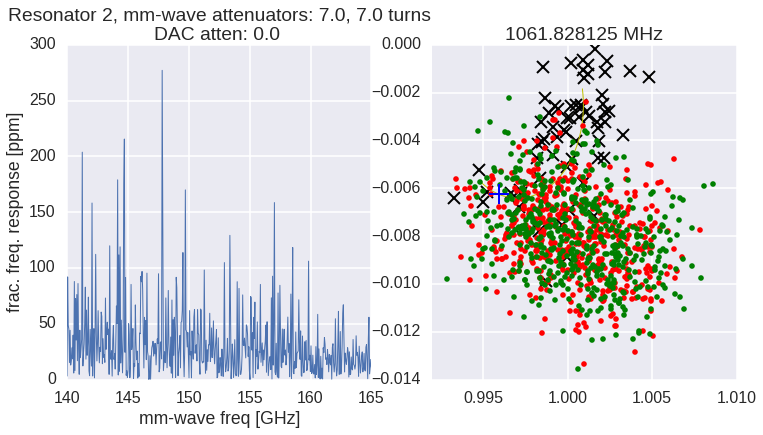

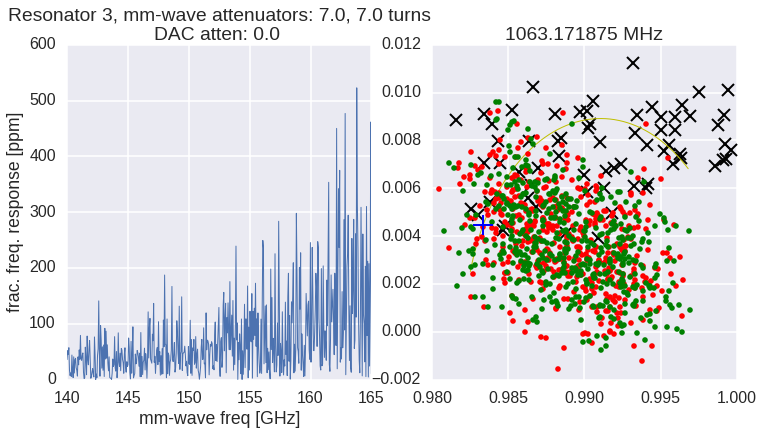

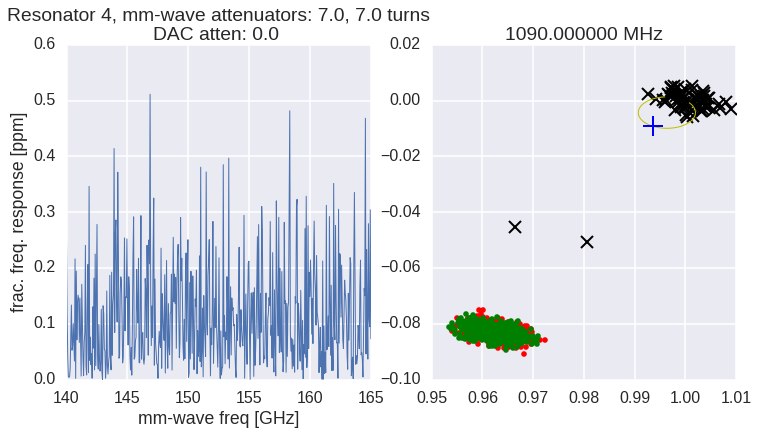

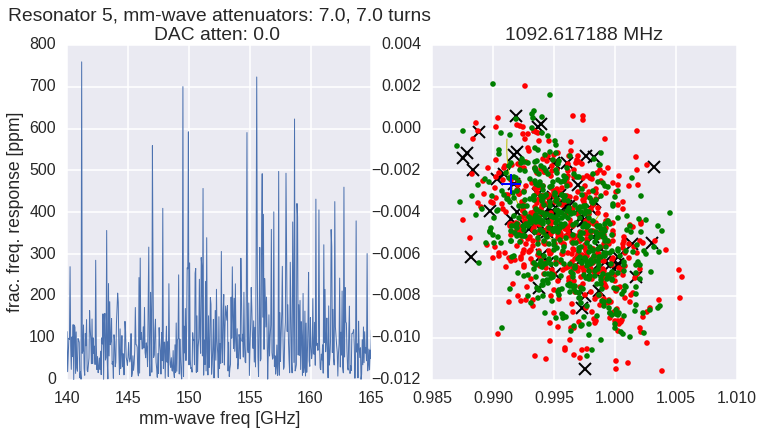

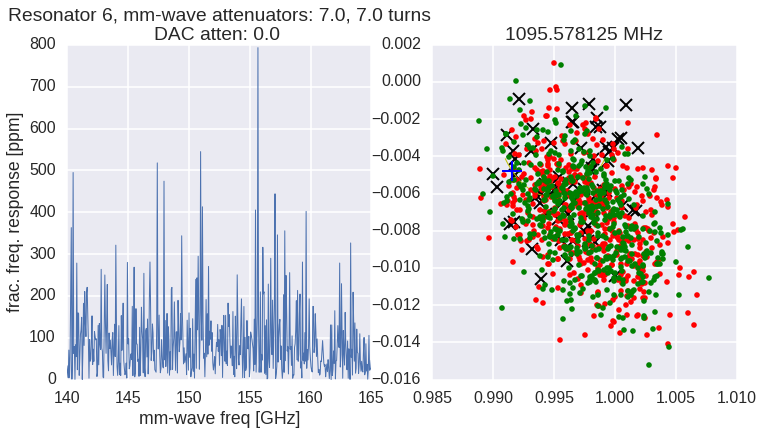

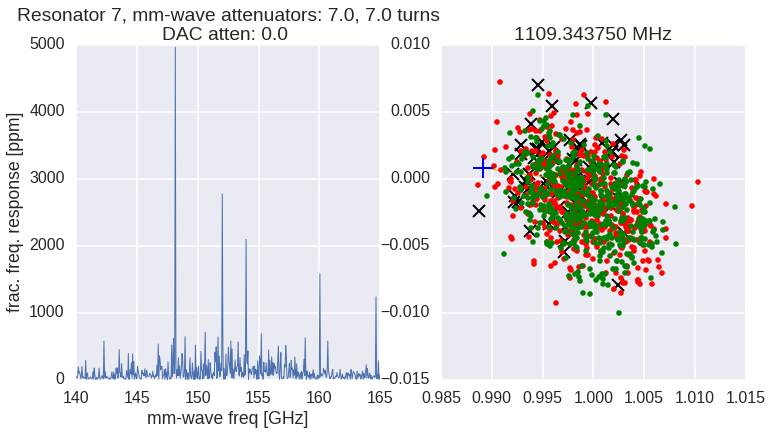

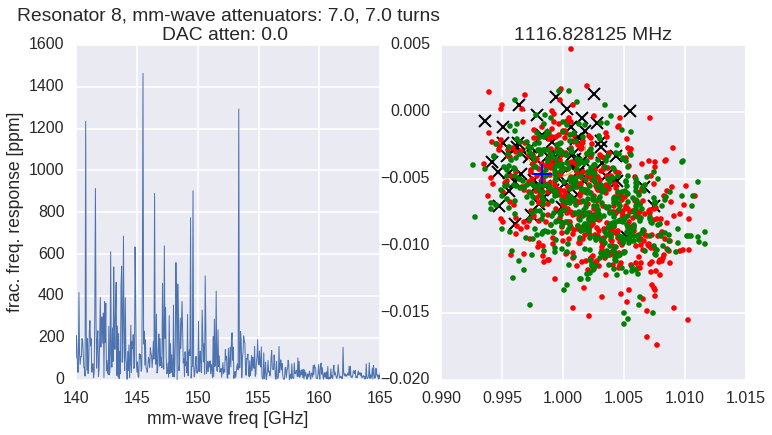

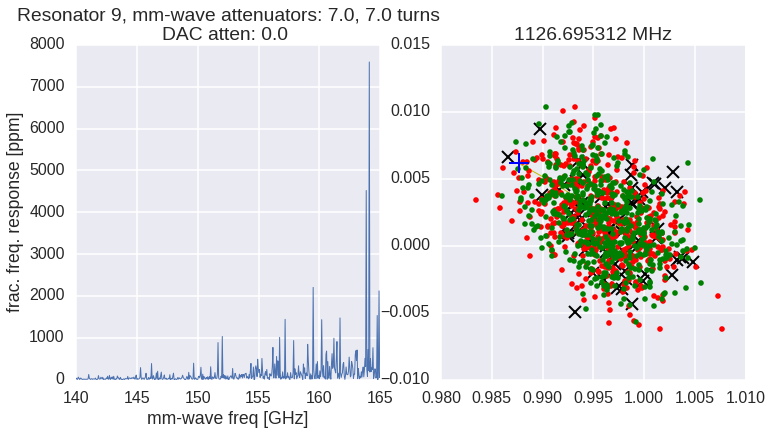

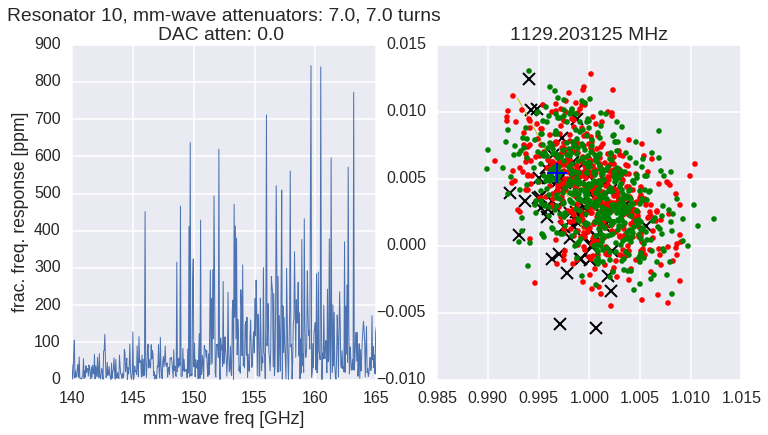

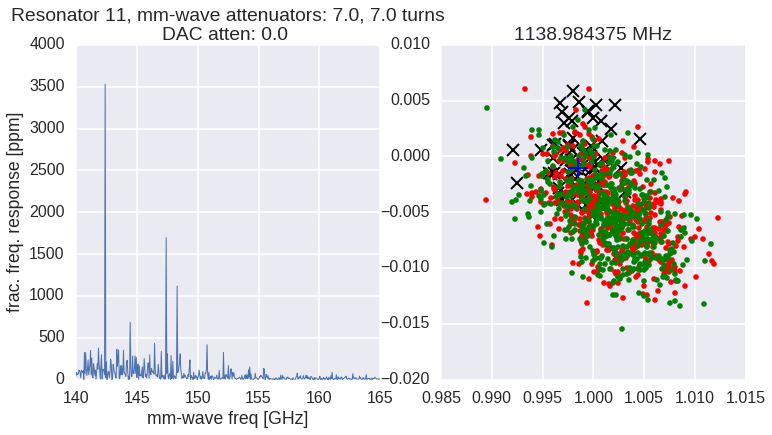

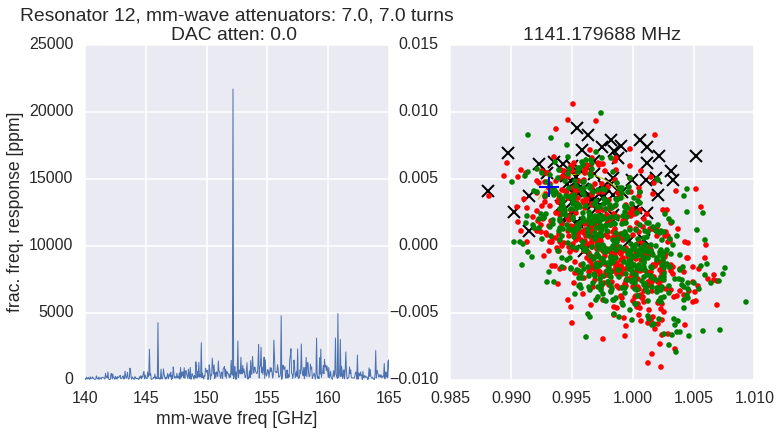

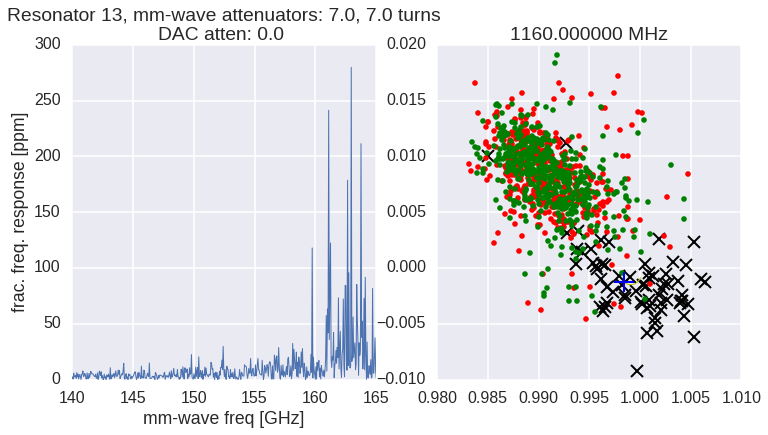

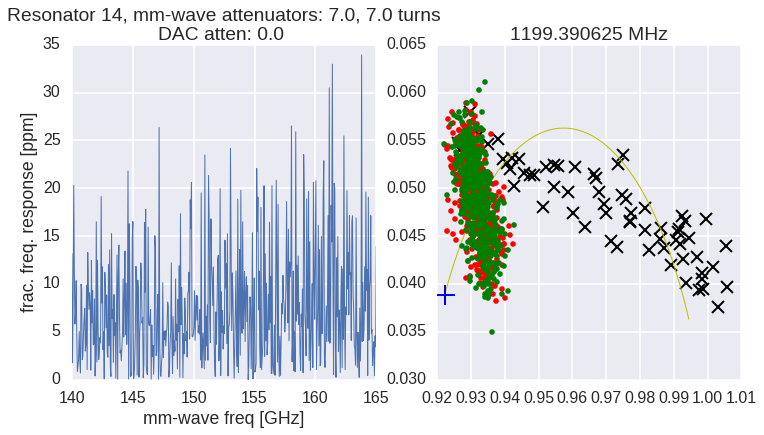

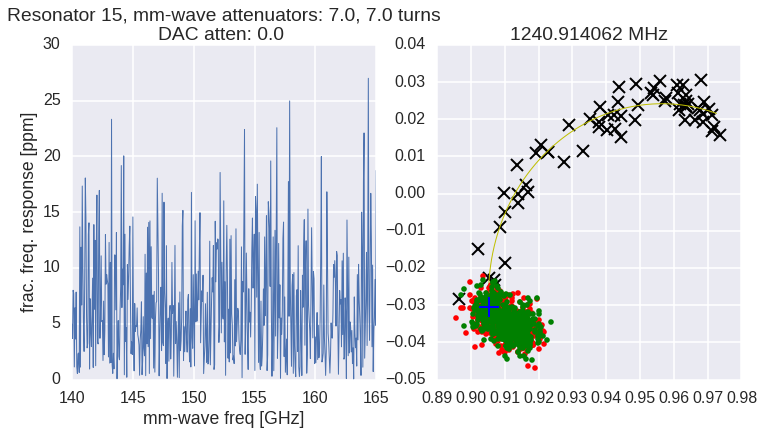

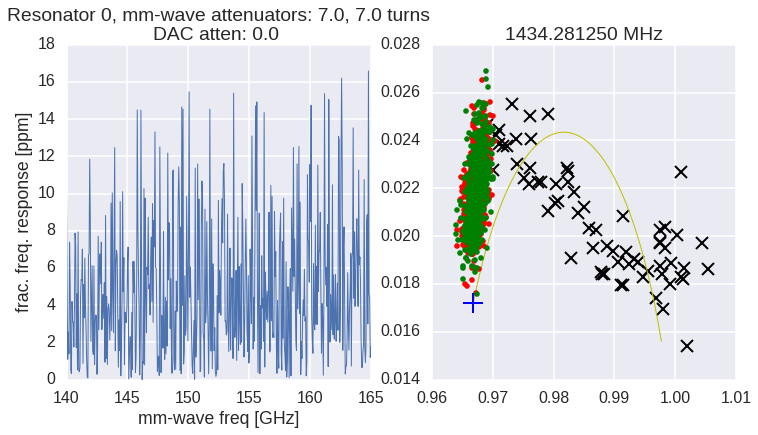

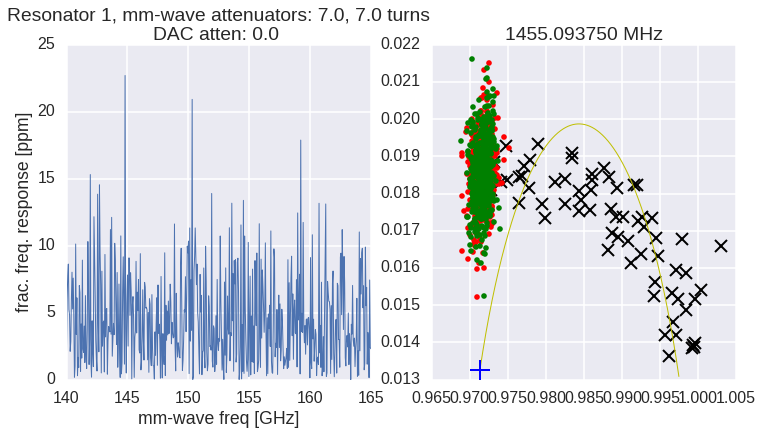

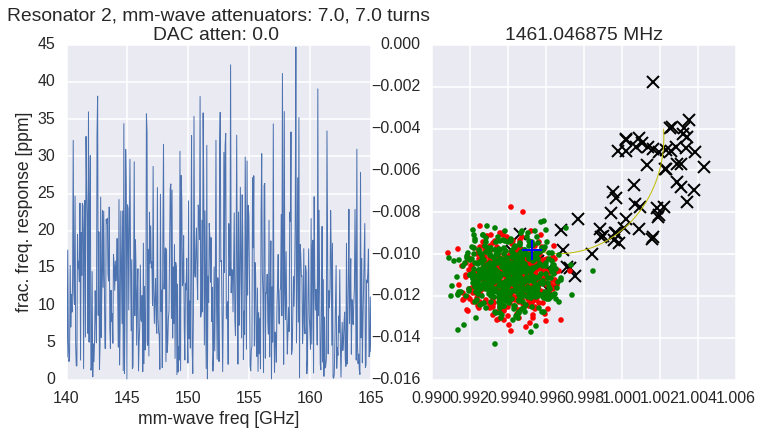

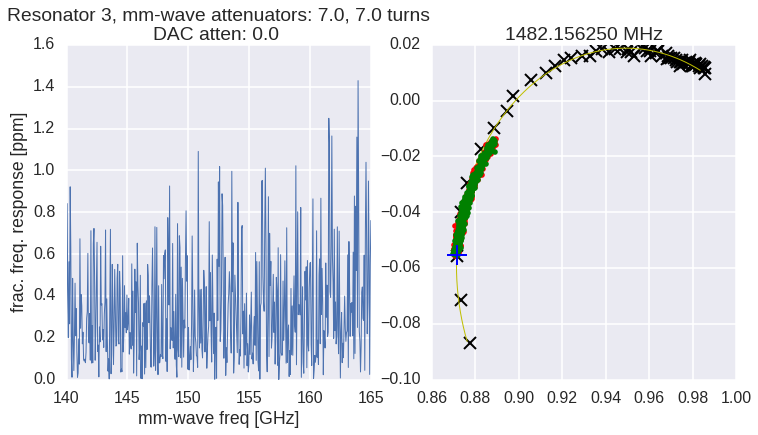

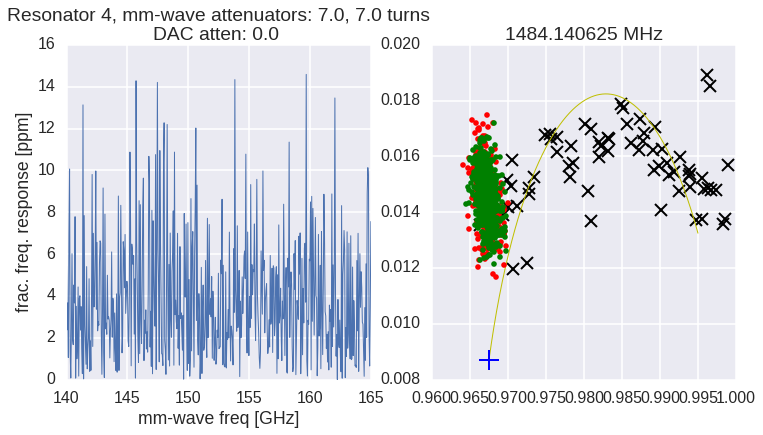

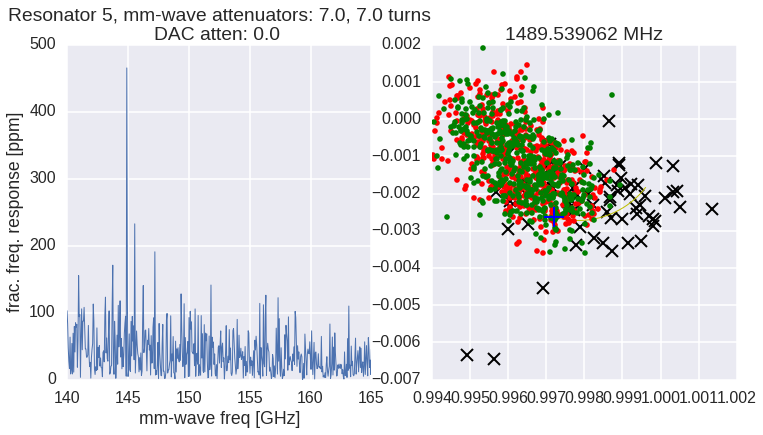

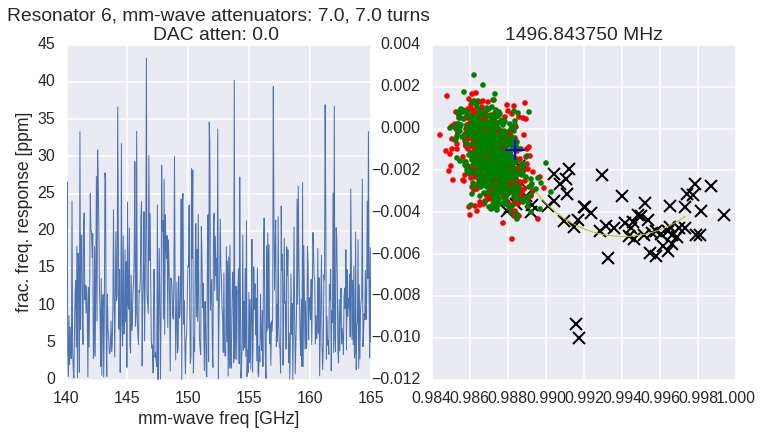

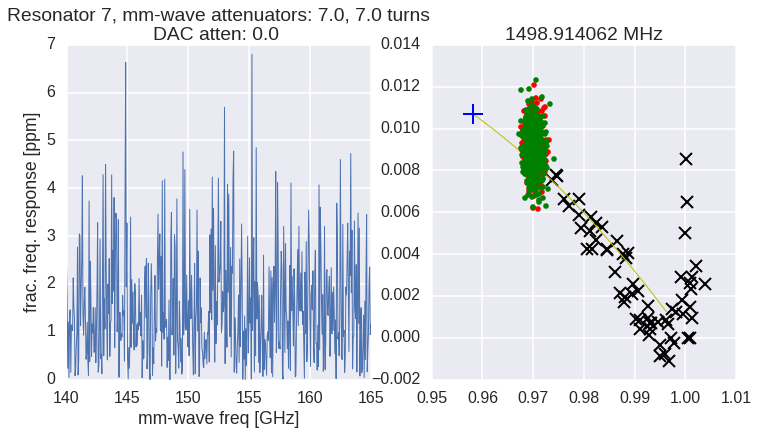

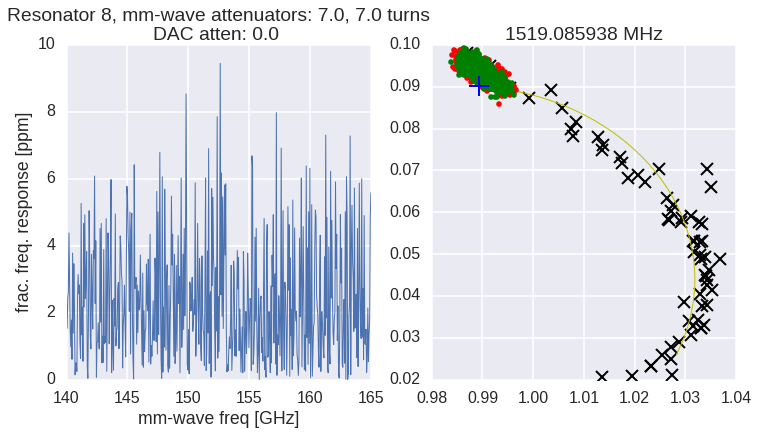

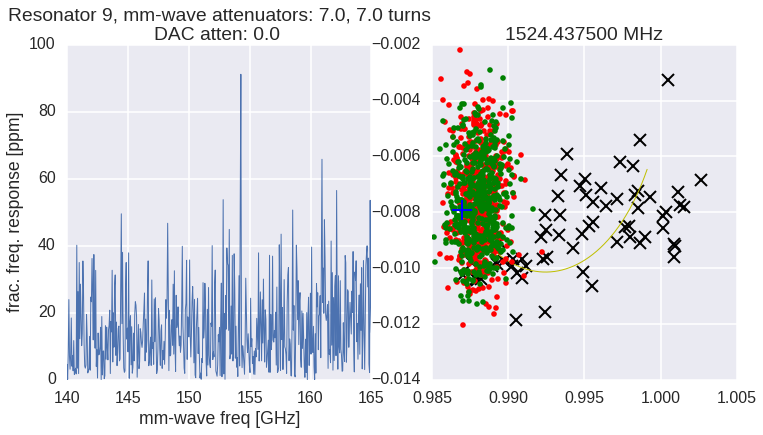

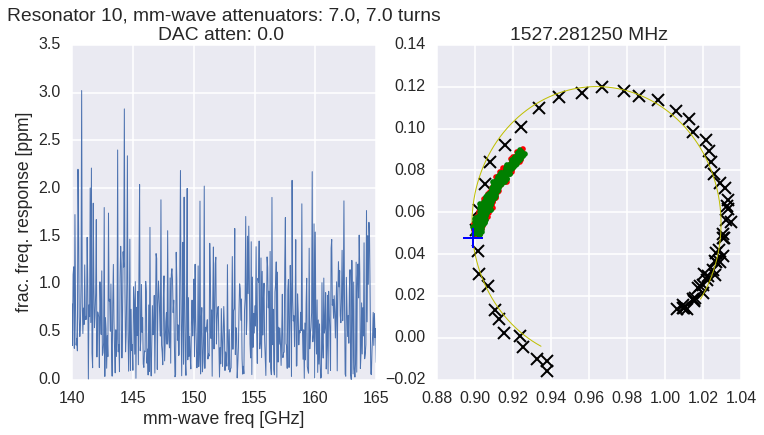

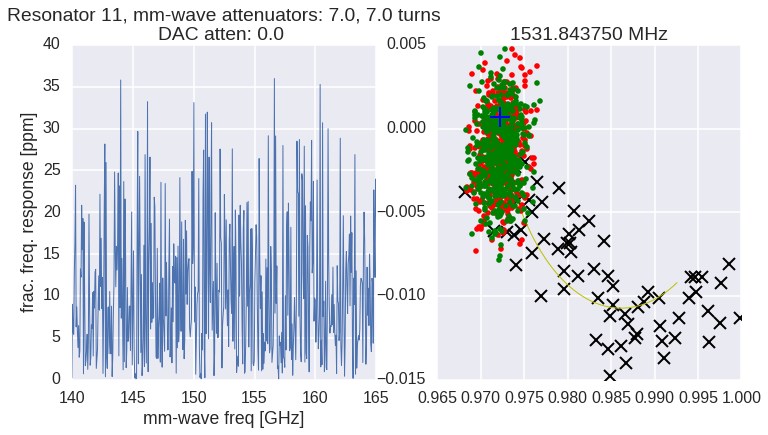

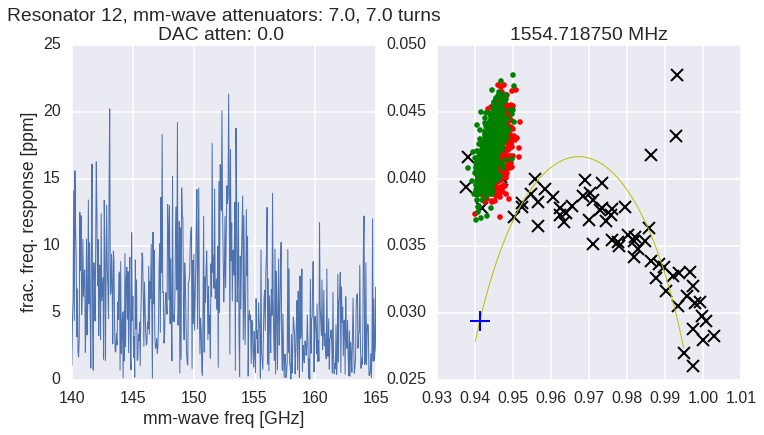

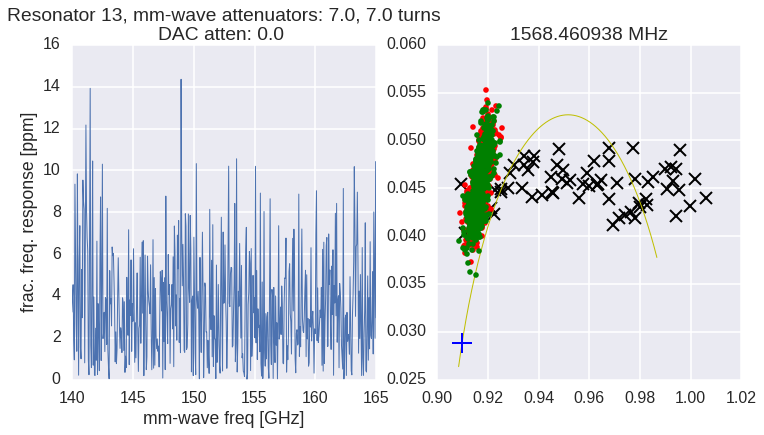

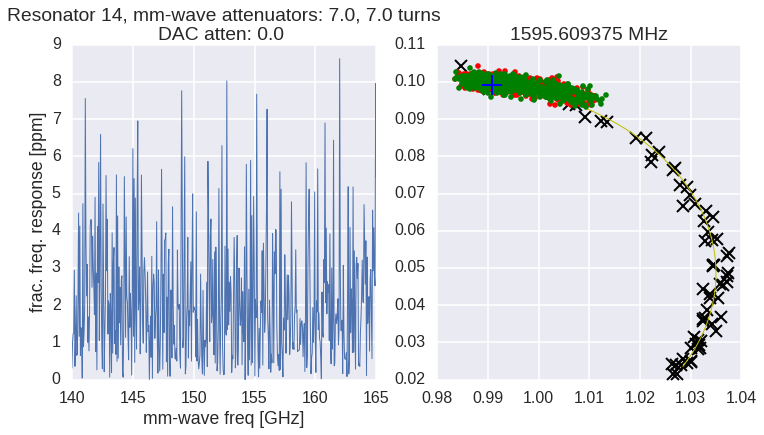

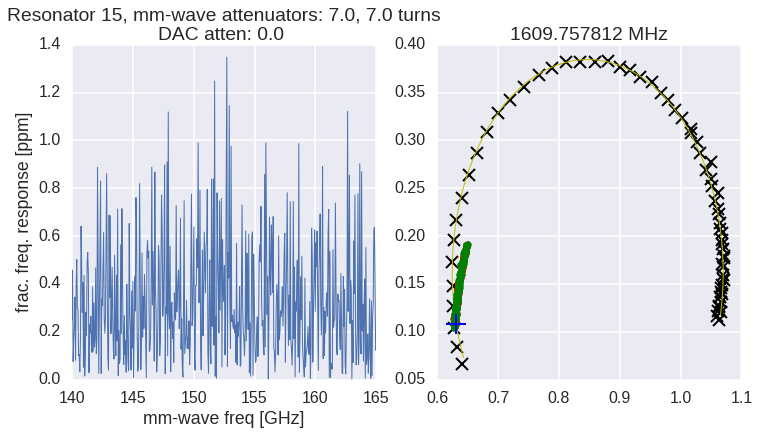

In [7]:
for mmw in mmws:
    blah= mmw.plot()
    #plt.savefig(plot_dir + ('mmw-detail-%.1f_MHz.png' % mmw.resonator.f_0),bbox_inches='tight')

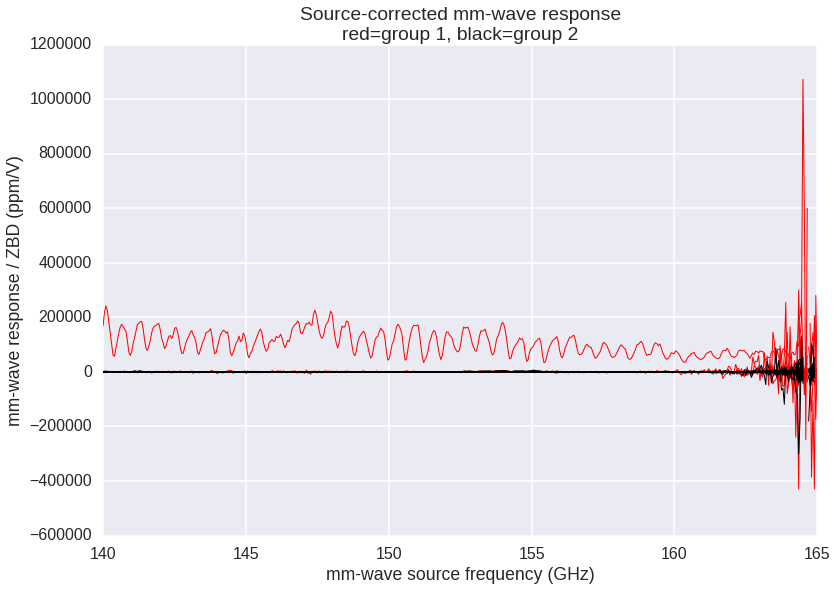

In [9]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws[1:]):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response/mmw.zbd_voltage,color=color)#/ mmw.zbd_voltage)
#ylim(.1,20)
ylabel('mm-wave response / ZBD (ppm/V)')
xlabel('mm-wave source frequency (GHz)')
title('Source-corrected mm-wave response\nred=group 1, black=group 2')
#plt.savefig(plot_dir + ('mmw-normalized-sweeps.png'),bbox_inches='tight')

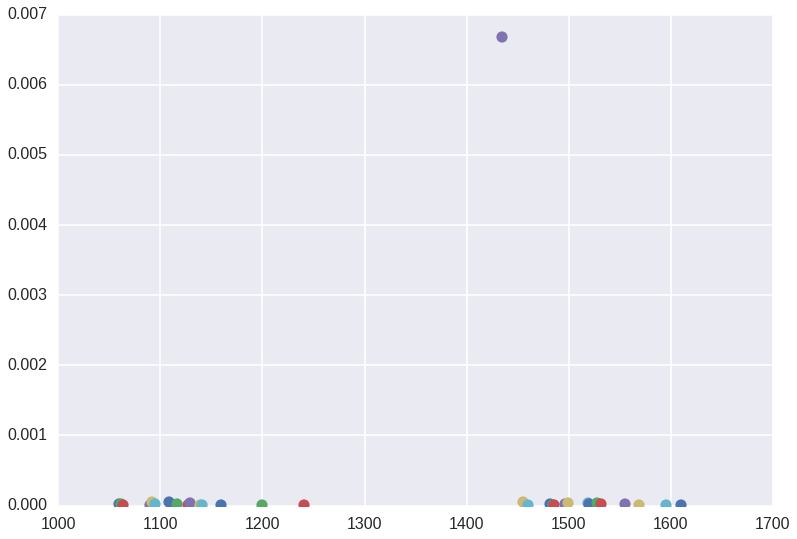

In [17]:
for mmw in mmws[1:]:
    plot(mmw.resonator.f_0,mmw.mmw_frac_response.sum(),'o')

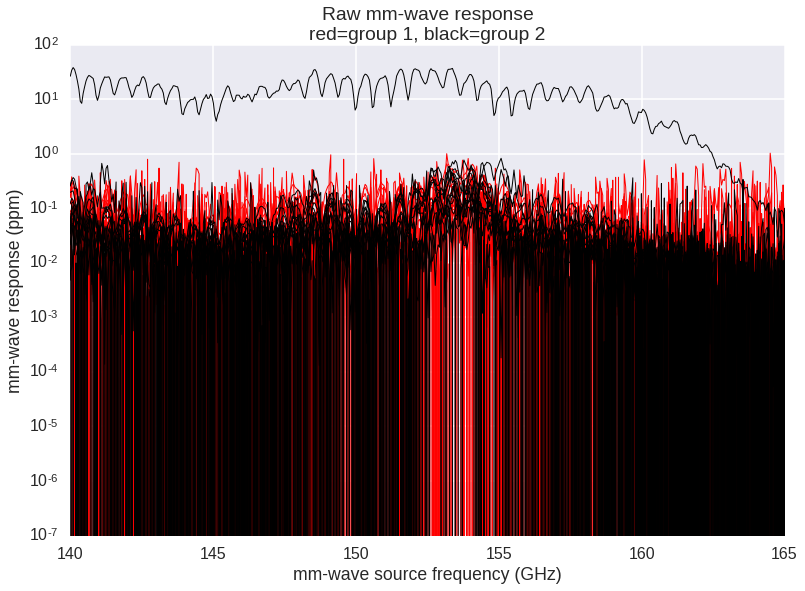

In [11]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws[0:]):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,color=color)#/ mmw.zbd_voltage)
#ylim(.1,20)
ylabel('mm-wave response (ppm)')
xlabel('mm-wave source frequency (GHz)')
title('Raw mm-wave response\nred=group 1, black=group 2')
yscale('log')
#plt.savefig(plot_dir + ('mmw-raw-sweeps.png'),bbox_inches='tight')

(0.1, 5)

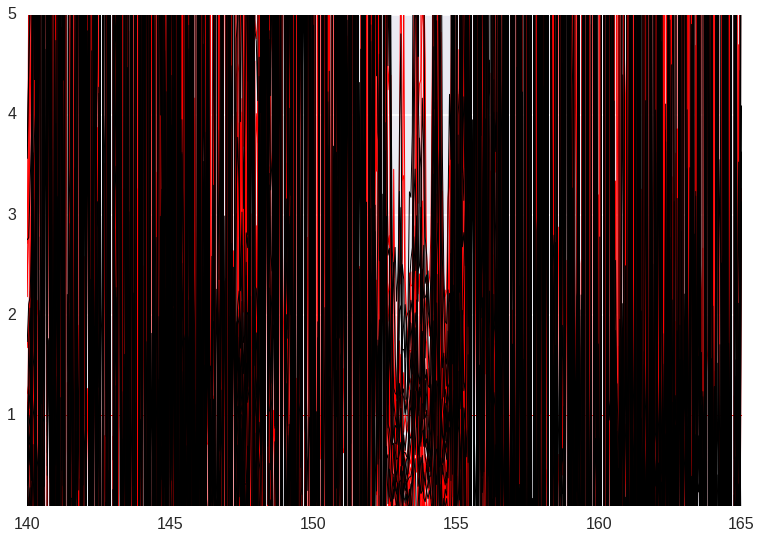

In [12]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmws[3].mmw_frac_response,color=color)#/ mmw.zbd_voltage)
ylim(.1,5)

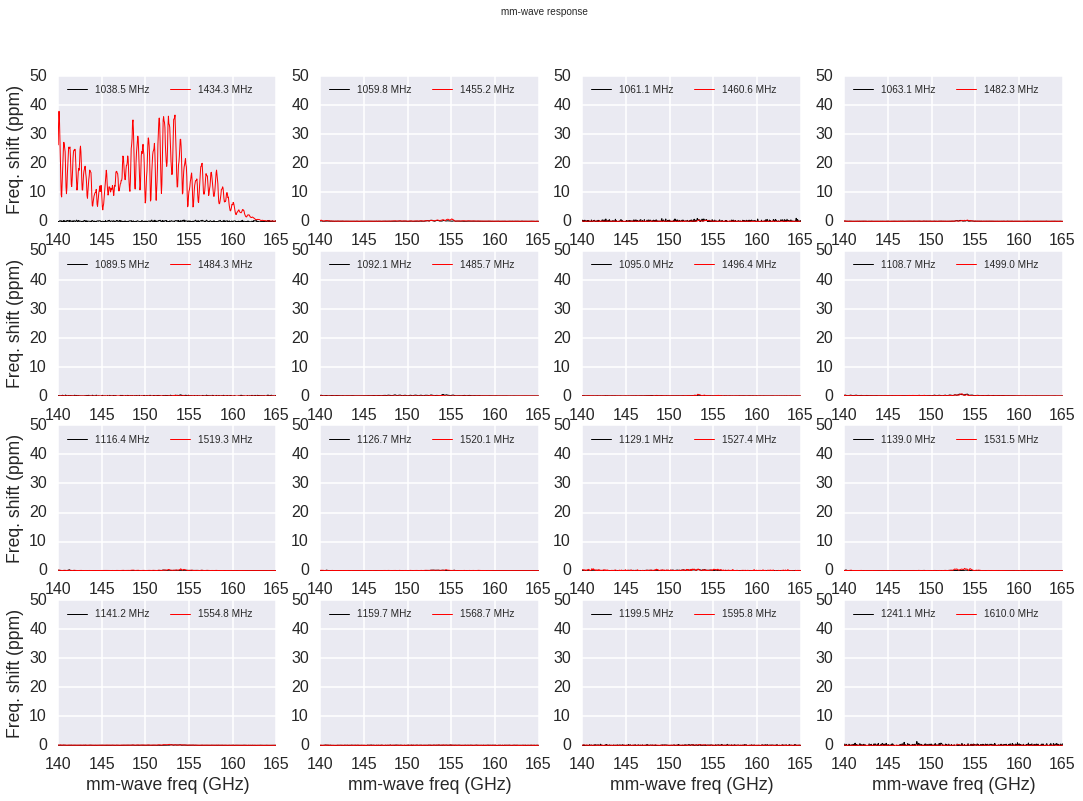

In [13]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(-.1,50)
    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
for k in range(4):
    axs[-1,k].set_xlabel('mm-wave freq (GHz)')
    axs[k,0].set_ylabel('Freq. shift (ppm)')
fig.suptitle('mm-wave response')
#plt.savefig(plot_dir + ('mmw-response-panels.png'),bbox_inches='tight')

In [14]:
f0s = np.array([mmw.resonator.f_0 for mmw in mmws])
Qs = np.array([mmw.resonator.Q for mmw in mmws])
Qis = np.array([mmw.resonator.Q_i for mmw in mmws])
Qers = np.array([mmw.resonator.Q_e_real for mmw in mmws])

In [15]:
f0s[16:]

array([ 1434.31543721,  1455.23533676,  1460.61460002,  1482.2654205 ,
        1484.29777309,  1485.66162216,  1496.39622727,  1498.98658116,
        1519.27203789,  1520.0685751 ,  1527.42015114,  1531.50745695,
        1554.83830533,  1568.69516524,  1595.78179025,  1610.02834995])

In [16]:
7/0

ZeroDivisionError: integer division or modulo by zero

In [ ]:
import pandas as pd

In [ ]:
fig,axs = subplots(4,4,figsize=(18,12))
for m in range(16):
    ax = axs.flatten()[m]
    best = np.inf
    for k in range(16):
        mmw1 = mmws[m].mmw_frac_response
        mmw2 = mmws[k+16].mmw_frac_response
        diff = np.sum(np.abs(mmw1-mmw2))
        if diff < best:
            best_k = k
            best = diff
    print mmws[m].resonator.f_0, mmws[best_k+16].resonator.f_0, best
    ax.plot(mmws[m].mmw_freq/1e9,1e6*mmws[m].mmw_frac_response,'r',label = ("%.1f MHz" % mmws[m].resonator.f_0))
    ax.plot(mmws[m].mmw_freq/1e9,1e6*mmws[best_k+16].mmw_frac_response,'k',label = ("%.1f MHz" % mmws[best_k+16].resonator.f_0))
    #mmw = mmws[k+16]
    #ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(0,50)

    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
    mmw = mmws[m+16]
    if mmw.resonator.f_0 > 1300:
        pol='A'
    else:
        pol = 'B'
    #pd.DataFrame(dict(mmw_freq=mmw.mmw_freq,response_frac_freq=mmw.mmw_frac_response)).to_csv('/artemis/readout/archive/2016-03-03-jpl-park-2015-10-40nm-al-mmwave-response-pol-%s-%.1f-MHz.csv' % (pol,mmw.resonator.f_0))

In [ ]:
!mkdir /artemis/readout/plots/2016-03-03-mmw-sweep-compare

In [ ]:
for m in range(16):
    fig,axs = subplots(4,4,figsize=(18,12))
    for k in range(16):
        ax =axs.flatten()[k]
        mmw = mmws[m]
        #ax.plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmws[k+16].mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
        ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
        ax.plot(mmw.mmw_freq/1e9,1e6*mmws[k+16].mmw_frac_response,'k',label = ("%.1f MHz" % mmws[k+16].resonator.f_0))
        #mmw = mmws[k+16]
        #ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
        ax.set_ylim(0,50)
        
        ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
    #fig.savefig('/artemis/readout/plots/2016-03-03-mmw-sweep-compare/%d_%.1f_MHz.pdf' % (m,mmw.resonator.f_0),bbox_inches='tight')

In [ ]:
fig,axs = subplots(2,1,figsize=(18,12))
for k in range(2):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(-.1,50)
    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))

In [ ]:
plot(mmw.zbd_voltage)

In [ ]:
#pd.DataFrame(dict(mmw_freq=mmw.mmw_freq, zbd_voltage=mmw.zbd_voltage)).to_csv('/artemis/readout/archive/2016-03-03-mmwave-zbd-voltage.csv')

In [ ]:
plot(f0s[:16],Qs[:16],'kd')
plot(f0s[16:],Qs[16:],'ro')
xlabel('Frequency (MHz)')
ylabel('Q')
ylim(0,50e3)
#plt.savefig(plot_dir + ('mmw-Q-vs-f0.png'),bbox_inches='tight')

In [ ]:
plot(f0s[:16],Qis[:16],'kd')
plot(f0s[16:],Qis[16:],'ro')
ylim(1000,1e6)
yscale('log')
xlabel('Frequency (MHz)')
ylabel('Q_i')
#plt.savefig(plot_dir + ('mmw-Qi-vs-f0.png'),bbox_inches='tight')

In [ ]:
plot(f0s[:16]*1.38,Qers[:16],'.')
plot(f0s[16:],Qers[16:],'o')
ylim(1000,1e6)
yscale('log')
ylabel('Qc')
xlabel('Frequency (MHz)')
#plt.savefig(plot_dir + ('mmw-Qe-vs-f0.png'),bbox_inches='tight')